In [33]:
using Distributions, StatPlots
points = [rand(Normal(1,2),100),rand(Normal(7,2),100)] 
allPoints = append!(points[1],points[2]);


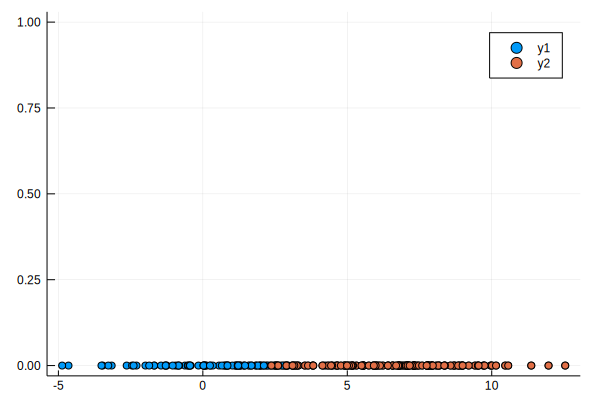

In [7]:
scatter(points[1],zeros(length(points[1])))
scatter!(points[2],zeros(length(points[2])))

In [9]:

mA = mean(allPoints[1:100])
println(mA)
sA = sqrt(var(allPoints[1:100]))
println(sA)
mB = mean(points[2])
sB = sqrt(var(points[2]))


0.6653058035567844
2.0045610647053382


2.1493396210980125

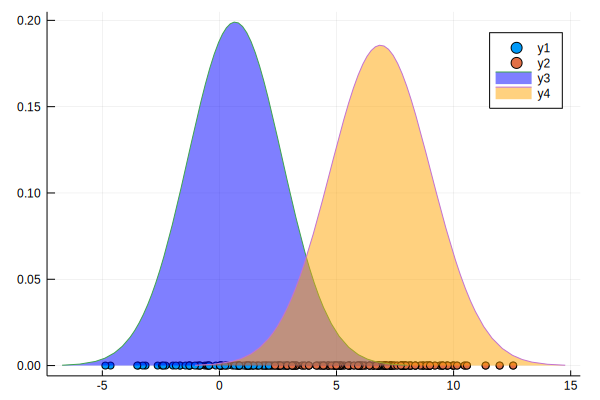

In [10]:

plot!(Normal(mA,sA), fill=(0, .5,:blue))
plot!(Normal(mB,sB), fill =(0,.5,:orange))

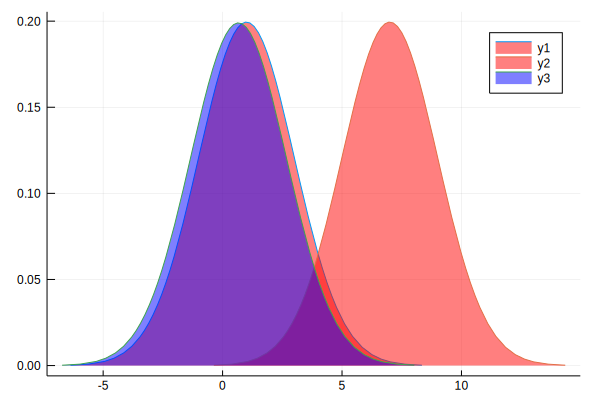

In [13]:

plot(Normal(1,2), fill=(0, 0.5,:red)) # y1
plot!(Normal(7,2),fill=(0, .5,:red)) # y2
plot!(Normal(mA,sA), fill=(0, .5,:blue)) # y3

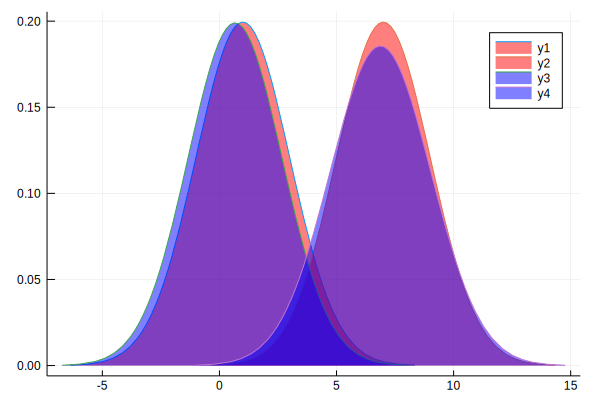

In [14]:

plot!(Normal(mB,sB), fill =(0,.5,:blue)) # y4

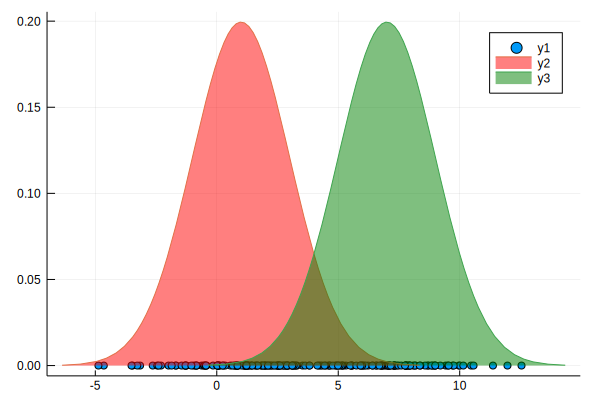

In [15]:
scatter(allPoints,zeros(200))
plot!(Normal(1,2),fill=(0, .5,:red)) # y1
plot!(Normal(7,2),fill=(0, .5,:green)) # y2


In [20]:
# Then we can calculate the probability of each point belonging to distribution A or B, 
# based on a posterior. 
A = Normal(1,2)
B = Normal(7,2)
pxA = map(x -> pdf(A,x),allPoints)
pxB = map(x -> pdf(B,x),allPoints)

pA = pxA./(pxA + pxB)
pB = 1- pA


function mark(x,y)
    if x > y
        return 0
        else
        return 1
    end
end

function assign(x,label)
    if label == 0
        return x
        else 
        return 
    end
end

marks = map((x,y) -> mark(x,y), pA,pB)

estPointsA = allPoints[marks .== 0]
estPointsB = allPoints[marks .== 1];

plot(A,fill=(0, .5,:green))
plot!(B,fill=(0, .5,:blue))
scatter!(estPointsA, zeros(length(estPointsA)),fill = (0, .5,:green));


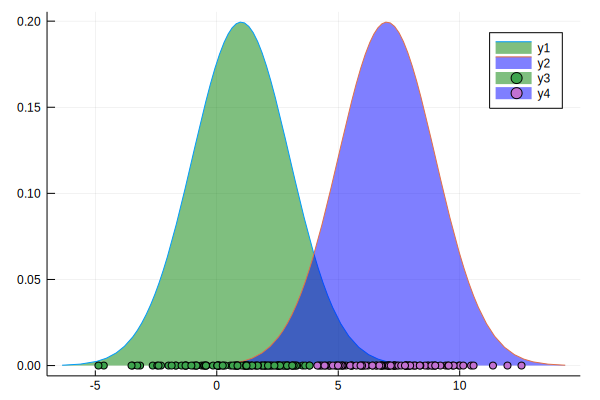

In [21]:
scatter!(estPointsB, zeros(length(estPointsB)),fill = (0, 0.5,:blue))

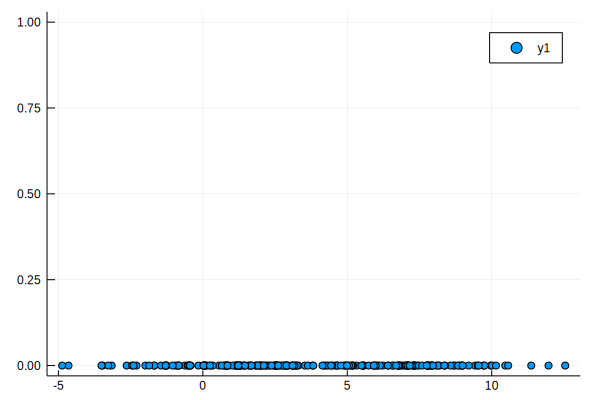

In [22]:
scatter(allPoints,zeros(200))

In [28]:

# true distributions. 
Atrue = Normal(1,2)
Btrue = Normal(7,2)


# initialize Guesses. 
iAMu = 3 
iBMu = 4
iASig = 0.7
iBSig = 4
piA = 0.7
piB = 1 - piA 

Astart = Normal(iAMu,iASig)
Bstart = Normal(iBMu,iBSig);

In [34]:
A = Astart
B = Bstart

Distributions.Normal{Float64}(μ=4.0, σ=4.0)

In [35]:
pxA = map(x -> pdf(A,x),allPoints)
pxB = map(x -> pdf(B,x),allPoints)

llold = -log(prod(piA.*pxA + piB.*pxB))
diff = 5

# Stop if the difference between the old and new logliklihoods are sufficiently close. 
while diff > 0.0001

    pxA = map(x -> pdf(A,x),allPoints)
    pxB = map(x -> pdf(B,x),allPoints)

    # E-step 
    ziA = (piA*pxA)./(piA*pxA + piB*pxB)
    ziB = 1 - ziA

    # M -Step 
    piA = mean(ziA)
    piB = 1 - piA

    muA = sum(allPoints.*ziA)./sum(ziA)
    muB = sum(allPoints.*ziB)./sum(ziB)

    sigA = sqrt(sum(((allPoints - muA).^2).*ziA)./sum(ziA))
    sigB = sqrt(sum(((allPoints - muB).^2).*ziB)./sum(ziB))

    llnew = -log(prod(piA.*pxA + piB.*pxB))
    diff = abs(llnew - llold)
    
    A = Normal(muA,sigA)
    B = Normal(muB,sigB)
    
    llold = llnew
end


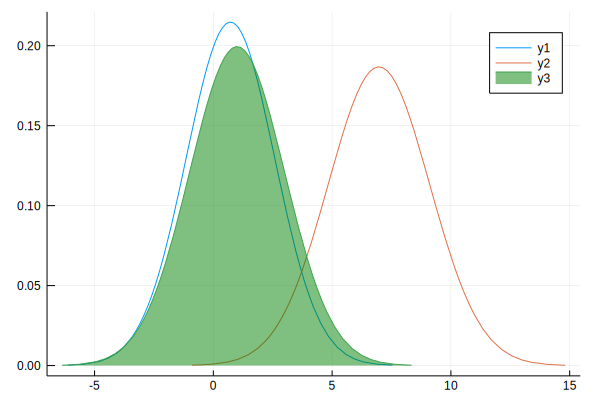

In [36]:
plot(A)
plot!(B)
plot!(Atrue,fill=(0, .5,:green))


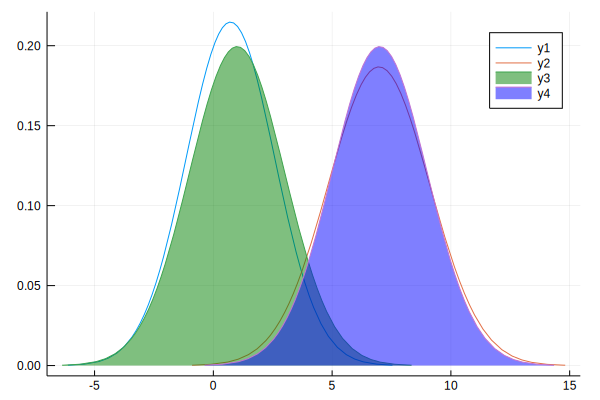

In [37]:
plot!(Btrue,fill=(0, .5,:blue))
